In [1]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())

C:\Users\ongha\anaconda3\envs\AbInitio\Lib\site-packages


In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
Path_to_GridPoints = Path("./test list csv files for Ge0.5Sn0.5/")

# Use the .glob() method to find all CSV files in that directory
csv_files = Path_to_GridPoints.glob("*.csv")

In [4]:
import pandas as pd
import numpy as np

# Initialize the dataframe and variables
grid_df = pd.DataFrame(columns=['smallest_r_diff', 'corresponding_z'])

Z_Si = 14
Z_Ge = 32
Z_Sn = 50

num_gridpoints = 8
num_nearestNeighbors = 5

Si = np.empty(num_gridpoints)
Ge = np.empty(num_gridpoints)
Sn = np.empty(num_gridpoints)
nearestNeighbors = np.empty(num_nearestNeighbors)

# Assuming csv_files is already defined elsewhere
for i, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    
    # Calculate the fraction of neighbors with atomic number of silicon, germanium, and tin
    Si[i] = (df.loc[df['z'] == Z_Si, ['r_diff']].size / df['z'].size)
    Ge[i] = (df.loc[df['z'] == Z_Ge, ['r_diff']].size / df['z'].size)
    Sn[i] = (df.loc[df['z'] == Z_Sn, ['r_diff']].size / df['z'].size)
    
    # Sort the dataframe by 'r_diff'
    df.sort_values(by=['r_diff'], ascending=True, inplace=True, ignore_index=True)
    
    # Get the smallest r_diff and corresponding atomic number (z)
    smallest_r_diff = df.iloc[0]['r_diff']
    corresponding_z = df.iloc[0]['z']
    
    # Store these values in grid_df, each row corresponds to a unique CSV file
    grid_df.at[i, 'smallest_r_diff'] = smallest_r_diff
    grid_df.at[i, 'corresponding_z'] = corresponding_z

# The grid_df will now have two columns:
# - 'smallest_r_diff' storing the smallest r_diff for each CSV.
# - 'corresponding_z' storing the atomic number corresponding to that smallest r_diff.


In [5]:
grid_df['%Si'] = Si
grid_df['%Ge'] = Ge
grid_df['%Sn'] = Sn

grid_df['rho_diff'] = [-0.0015, -0.0048, -6.2674e-04, -5.5688e-04, -6.5248e-04, 3.3247e-04, 1.3290e-04, -5.4500e-05]

In [6]:
grid_df

,smallest_r_diff,corresponding_z,%Si,%Ge,%Sn,rho_diff
0,1.196392,50.0,0.0,0.073725,0.926275,-0.001500
1,0.0,50.0,0.0,0.000000,1.000000,-0.004800
2,0.563985,50.0,0.0,0.057414,0.942586,-0.000627
3,0.563985,50.0,0.0,0.000000,1.000000,-0.000557
4,0.563985,50.0,0.0,0.057414,0.942586,-0.000652
5,0.0,50.0,0.0,0.000000,1.000000,0.000332
6,0.0,50.0,0.0,0.000000,1.000000,0.000133
7,0.0,50.0,0.0,0.000000,1.000000,-0.000055


Text(0.5, 0, '$\\%$ Sn')

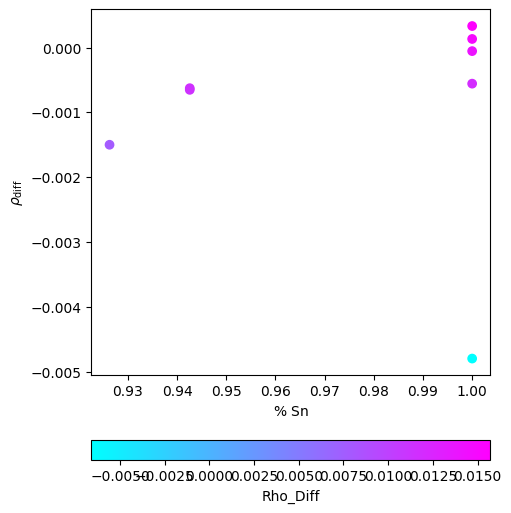

In [7]:
fig, ax = plt.subplots(figsize=(5,5), layout='constrained')

plt.scatter(grid_df["%Sn"], grid_df["rho_diff"], c=grid_df["rho_diff"], cmap=mpl.cm.cool)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=df.nsmallest(1, 'rho_diff')["rho_diff"], vmax=df.nlargest(1, 'rho_diff')["rho_diff"])

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal', label='Rho_Diff')

ax.set_ylabel(r"$\rho_{\text{diff}}$")
ax.set_xlabel(r"$\%$ Sn")

In [8]:
# import numpy as np
# from pysr import PySRRegressor

# # Example dataset
# X = np.random.randn(100, 1)  # Single feature
# y = X[:, 0]**2 # Synthetic target

# model = PySRRegressor(
#     niterations=1000,        # Higher → more thorough search
#     binary_operators=["+", "-", "*", "/"],
#     unary_operators=["exp", "log", "sin", "cos"],
#     model_selection="best",  # "best" or "accuracy" or "complexity"
# )

# model.fit(X, y)


In [9]:
# model.get_best().sympy_format
# # y = 2 * X[:, 0]**2 + 3 * X[:, 0] + 5  # Synthetic target

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Example: Assuming 'rho_diff' is the target variable and other columns are features
X = grid_df.drop(columns=['rho_diff'])  # Features: All columns except 'rho_diff'
y = grid_df['rho_diff']  # Target: 'rho_diff'

In [25]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [26]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 5.8185206757896016e-06
R-squared: -0.42459828195458216


C:\Users\ongha\AppData\Local\Temp\ipykernel_17896\3440734039.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_pred, y_test, cmap=mpl.cm.cool)


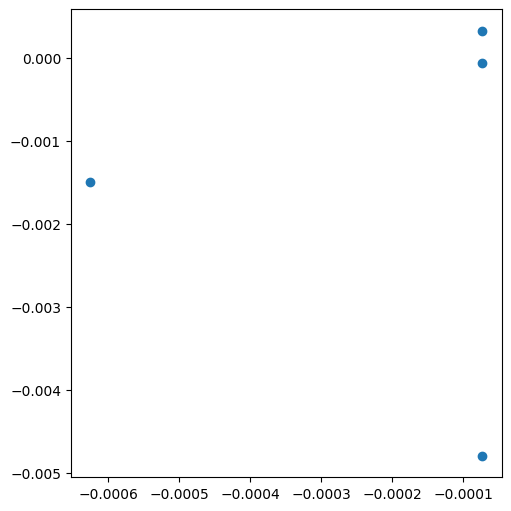

In [28]:
fig, ax = plt.subplots(figsize=(5,5), layout='constrained')

plt.scatter(y_pred, y_test, cmap=mpl.cm.cool)

In [29]:
y_train

2   -0.000627
4   -0.000652
3   -0.000557
6    0.000133
Name: rho_diff, dtype: float64